# Step 1: Import Python Modules

In [1]:
# import relevant libraries
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import display

# to create gif
import imageio
import os

%matplotlib inline
# to include graphs inline within the frontends next to code

sns.set(font_scale = 2)
plt.rcParams['font.size'] = 24

# Step 2: Load & Understand Data

In [2]:
gapminder_csv_url = 'http://bit.ly/2cLzoxH'
df = pd.read_csv(gapminder_csv_url)

# load and display first rows
df.rename(columns={"lifeExp" : "life_expectancy" }, inplace=True)
display(df.head())

,country,year,pop,continent,life_expectancy,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [3]:
display(df.describe())

,year,pop,life_expectancy,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165877
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846989
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


**Which countries are represented in the data?**

In [4]:
print(df.country.value_counts())

Czech Republic        12
South Africa          12
New Zealand           12
Switzerland           12
Guinea-Bissau         12
Congo Rep.            12
Croatia               12
Morocco               12
Jordan                12
Nepal                 12
Oman                  12
Denmark               12
Netherlands           12
Honduras              12
Zimbabwe              12
Gabon                 12
Slovak Republic       12
Jamaica               12
Sierra Leone          12
Djibouti              12
Nicaragua             12
Taiwan                12
Kenya                 12
Burundi               12
Reunion               12
Colombia              12
Lesotho               12
Albania               12
Singapore             12
Yemen Rep.            12
                      ..
Norway                12
Peru                  12
Somalia               12
Comoros               12
Senegal               12
Liberia               12
France                12
Mongolia              12
Germany               12


142 countries available in the dataset.

**What years are represented in the data?**

In [5]:
df["year"].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

Years started from 1952, with 5 increments and ended in 2005.

# Step 3: Visualize Life Expectancy Distribution

## Histogram

In [6]:
# look at the data range
print(df.life_expectancy.min(), df.life_expectancy.max())

(23.599, 82.603)


### Histogram with bins=60

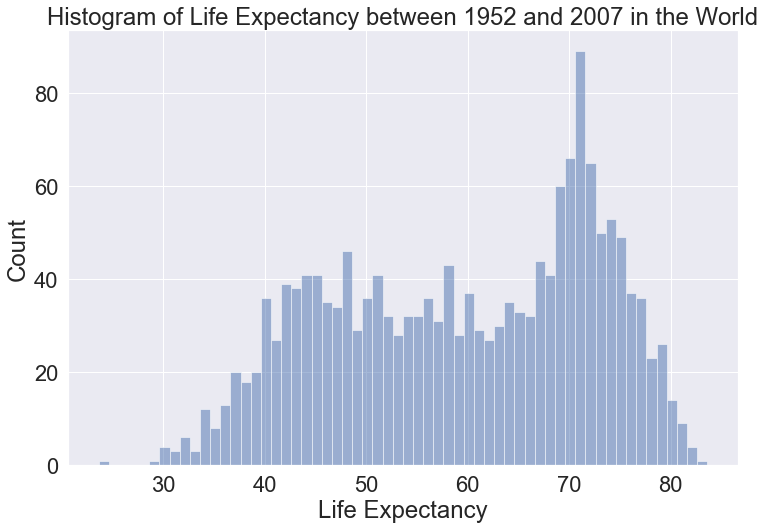

In [7]:
# prepare plot
f, axes = plt.subplots(figsize=(12, 8))

# set the plot
plt.hist(df.life_expectancy,
         range=(df.life_expectancy.min(), df.life_expectancy.max()+1),
         bins=60,
         alpha=0.5)

# set title, legends and labels and xticks
plt.xlabel("Life Expectancy")
plt.ylabel("Count")
plt.title("Histogram of Life Expectancy between 1952 and 2007 in the World")

# save and show plot
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/hist_60.png')
plt.show()

### Histogram with bins=25

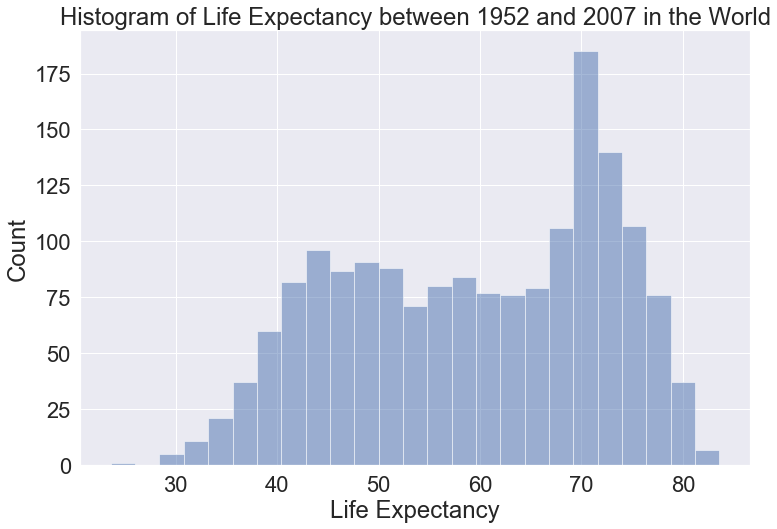

In [8]:
# prepare plot
f, axes = plt.subplots(figsize=(12, 8))

# set the plot
plt.hist(df.life_expectancy,
         range=(df.life_expectancy.min(), df.life_expectancy.max()+1),
         bins=25,
         alpha=0.5)


# set title, legends and labels and xticks
plt.xlabel("Life Expectancy")
plt.ylabel("Count")
plt.title("Histogram of Life Expectancy between 1952 and 2007 in the World")

# save and show plot
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/hist_20.png')
plt.show()

### Histogram with bins=5

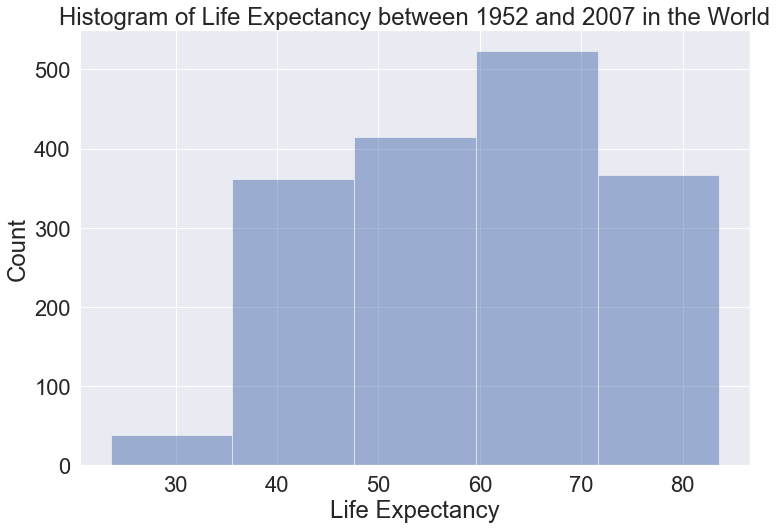

In [9]:
# prepare plot
f, axes = plt.subplots(figsize=(12, 8))

# set the plot
plt.hist(df.life_expectancy,
         range=(df.life_expectancy.min(), df.life_expectancy.max()+1),
         bins=5,
         alpha=0.5)

# set title, legends and labels and xticks
plt.xlabel("Life Expectancy")
plt.ylabel("Count")
plt.title("Histogram of Life Expectancy between 1952 and 2007 in the World")

# save and show plot
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/hist_5.png')
plt.show()

**Interpretation of Life Expectancy Histogram:**
* Distribution has one peak at 70.
* It is a left-skewed and unimodal distribution.
* Median is slightly bigger than the mean, both are around 60.
* Life expectancy is spread between  between 25 and 85.
* Data is concentrated around 50 and 70.
* There are few outliers in the dataset and they are smaller than 30 or bigger than 80.

## KDE Plot

Text(0,0.5,'Density')

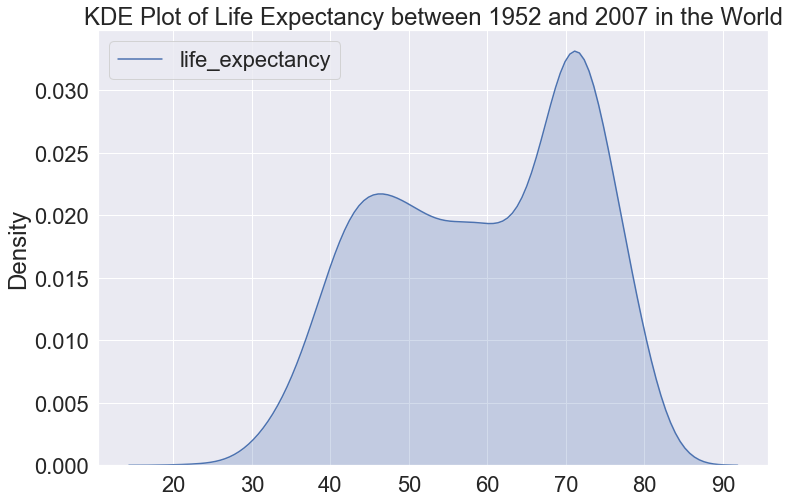

In [10]:
# prepare plot
f, axes = plt.subplots(figsize=(12,8))

# set the plot
ax = sns.kdeplot(df.life_expectancy, shade=True, color="b")

# set the title and x,y labels
plt.title("KDE Plot of Life Expectancy between 1952 and 2007 in the World")
plt.ylabel("Density")

# save figure
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/kdeplot.png')

Text(0.5,0,'Life Expectancy')

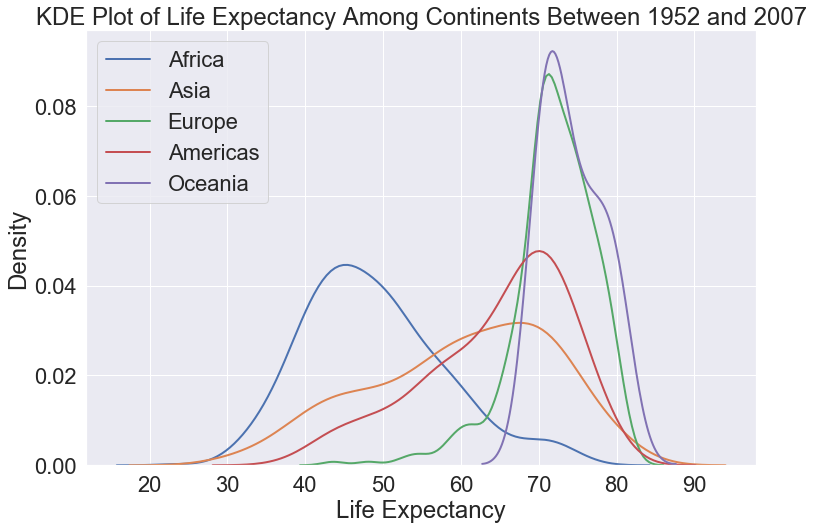

In [11]:
# prepare plot
f, axes = plt.subplots(figsize=(12,8))

# create list of continents
continents = df['continent'].value_counts().index.tolist()

# set kde plot for each continent
for c in continents:
    subset = df[df['continent'] == c]
    sns.kdeplot(subset["life_expectancy"], label=c, linewidth=2)
    
# set title, x and y labels
plt.title("KDE Plot of Life Expectancy Among Continents Between 1952 and 2007")
plt.ylabel("Density")
plt.xlabel("Life Expectancy")

# save figure
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/kdeplot_cat.png')

## Distribution Plot

### Distribution Plot with Histogram

Text(0,0.5,'Density')

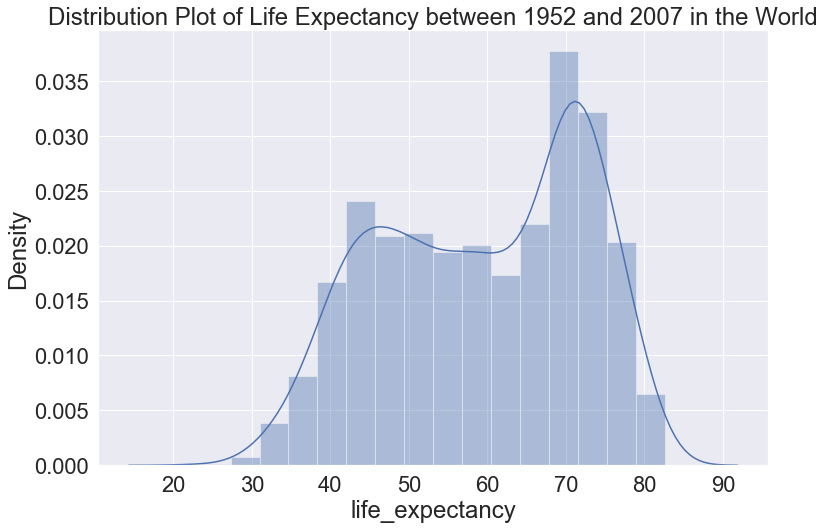

In [12]:
# prepare plot
f, axes = plt.subplots(figsize=(12,8))

# set plot
ax = sns.distplot(df.life_expectancy, hist=True, color="b")

# set title and x,y labels
plt.title("Distribution Plot of Life Expectancy between 1952 and 2007 in the World")
plt.ylabel("Density")

# save figure
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/distplot.png')

### Distribution Plot without Histogram

Text(0,0.5,'Density')

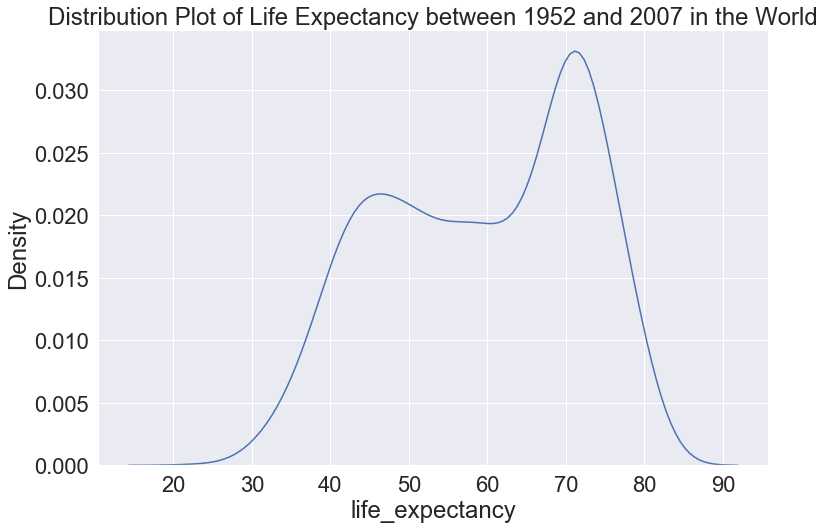

In [13]:
# prepare plot
f, axes = plt.subplots(figsize=(12,8))

# set plot
ax = sns.distplot(df.life_expectancy, hist=False, color="b")

# set title and x,y labels
plt.title("Distribution Plot of Life Expectancy between 1952 and 2007 in the World")
plt.ylabel("Density")

# save figure
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/distplot_wohist.png')

## Boxplot

Text(0.5,1,'Boxplot of Life Expectancy between 1952 and 2007 in the World')

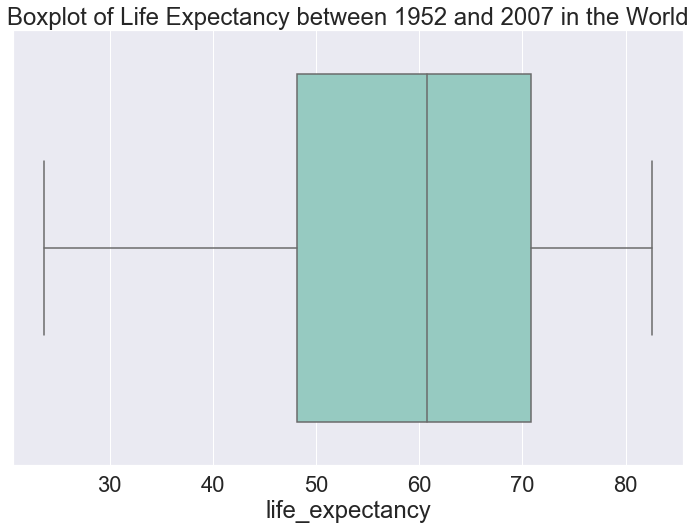

In [14]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set the plot
sns.boxplot(x="life_expectancy", data=df, palette="Set3")

# set title and save figure
plt.title("Boxplot of Life Expectancy between 1952 and 2007 in the World")
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/boxplot.png')

**Life Expectancy in the World Summary Statistics:**
* Data range is between 25 and 82 approximately. 
* First quartile is 48.
* Median (second quartile) is 60.
* Third quartile is 71.
* Half of the life expectancy data is between 48 and 71, meaning within the box.
* There aren't any outliers in the data.

Text(0.5,1,'Boxplot of Life Expectancy Among Continents Between 1952 and 2007')

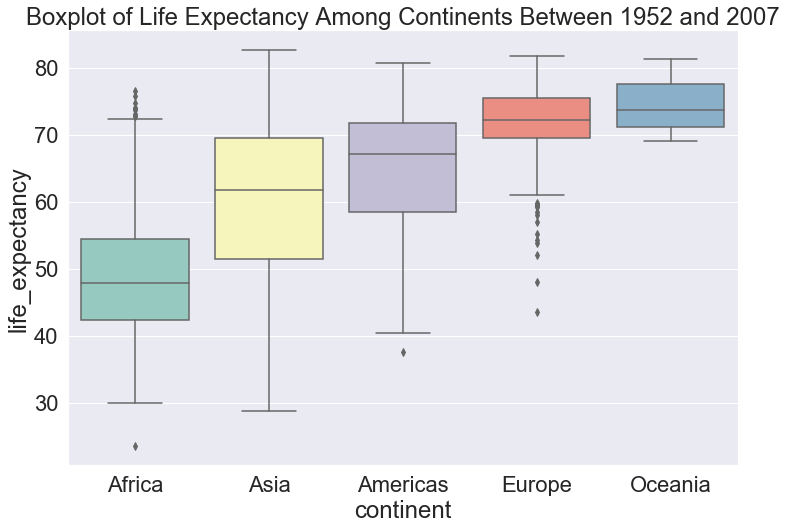

In [15]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set the plot with the ordered continents
sns.boxplot(x="continent", y="life_expectancy", data=df,
            palette="Set3",
            order=["Africa", "Asia", "Americas", "Europe", "Oceania"])

# set title and save figure
plt.title("Boxplot of Life Expectancy Among Continents Between 1952 and 2007")
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/boxplot_cat.png')

**Some Findings from Life Expectancy Summary Statistics of Continents:**
* Africa has few outliers, which are more than 70 and less than 30.
* Americas has an outlier which is less than 40.
* Life expectancy data range starts at 60, which makes every data point smaller than 60 as outliers.
* Asia has the widest life expectancy data range.
* Oceania has the highest quartiles.
* Half of the life expectancy data points lie between 70 and 75 in Europe and Oceania.

## Boxenplot

Text(0.5,1,'Boxenplot of Life Expectancy Among Continents Between 1952 and 2007')

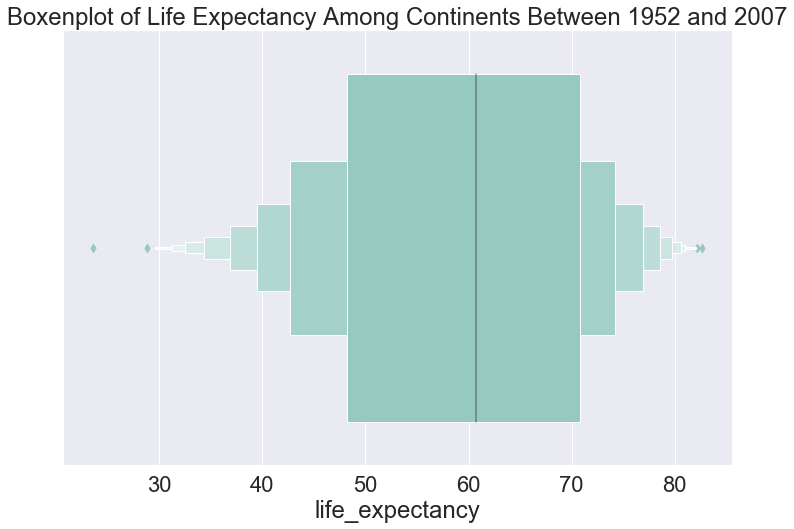

In [16]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set plot
sns.boxenplot(x="life_expectancy", data=df,palette="Set3")

# set title and save plot
plt.title("Boxenplot of Life Expectancy Among Continents Between 1952 and 2007")
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/boxenplotplot.png')

**Interpretation of Boxenplot for Life Expectancy in the World:**
* Median is at 60.
* First and third quartiles (or fourths) are at 48 and 71 respectively.
* Eights are at 42 and 74.
* Sixteenths are at 40 and 76.
* There are 2 outliers which are less than 30: 22, 28.
* There are 2 outliers which are more than 80.

Text(0.5,1,'Boxenplot of Life Expectancy Among Continents Between 1952 and 2007')

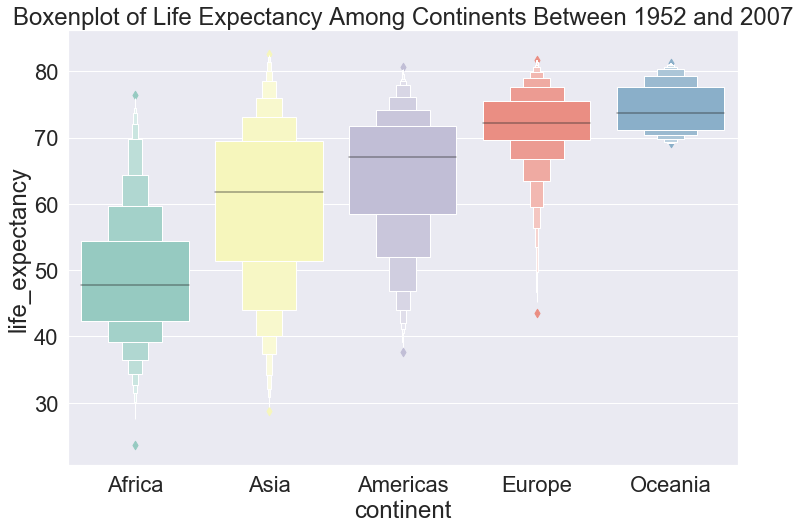

In [17]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set plot
sns.boxenplot(x="continent", y="life_expectancy", data=df,
               palette="Set3",
               order=["Africa", "Asia", "Americas", "Europe", "Oceania"])

# set title and save plot
plt.title("Boxenplot of Life Expectancy Among Continents Between 1952 and 2007")
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/boxenplot.png')

## Violinplot

Text(0.5,1,'Violinplot of Life Expectancy between 1952 and 2007 in the World')

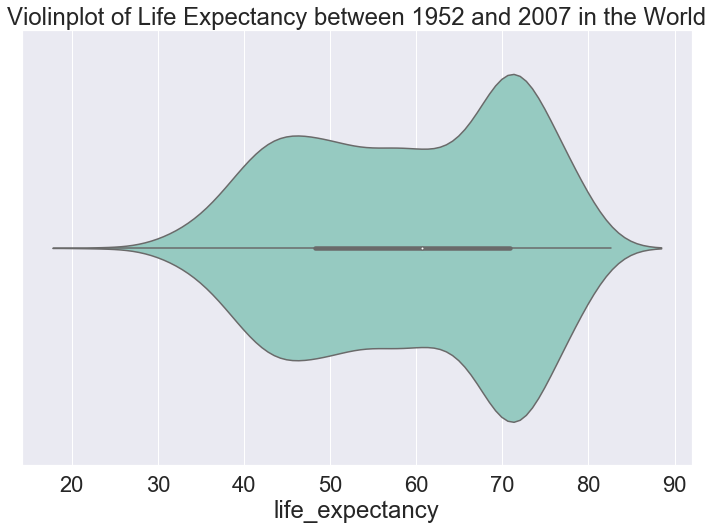

In [18]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set the plot
sns.violinplot(x="life_expectancy", data=df, palette="Set3")

# set title and save figure
plt.title("Violinplot of Life Expectancy between 1952 and 2007 in the World")
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/violinplot.png')

Text(0.5,1,'Violinplot of Life Expectancy Among Continents Between 1952 and 2007')

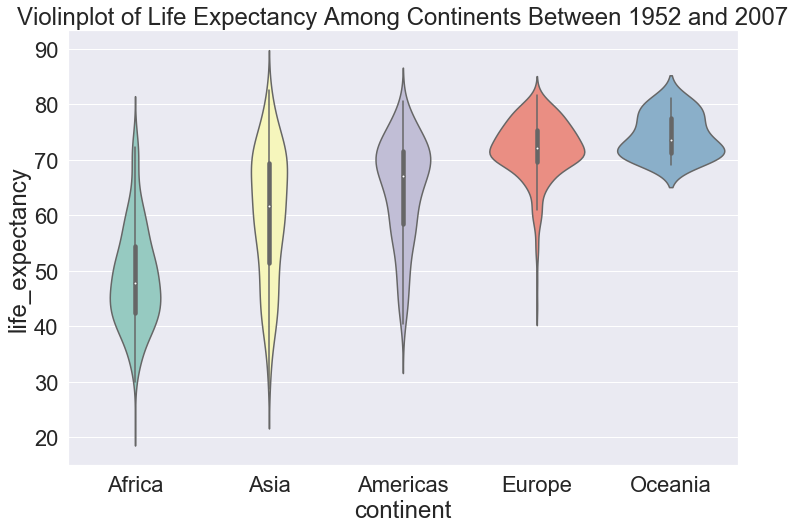

In [19]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set the plot with ordered continents
sns.violinplot(x="continent", y="life_expectancy", data=df,
               palette="Set3",
               order=["Africa", "Asia", "Americas", "Europe", "Oceania"])

# set title and save figure
plt.title("Violinplot of Life Expectancy Among Continents Between 1952 and 2007")
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/violinplot_cat.png')

### Violinplots with different `inner` Parameter

Text(0.5,1,'Violinplot of Life Expectancy Among Continents Between 1952 and 2007')

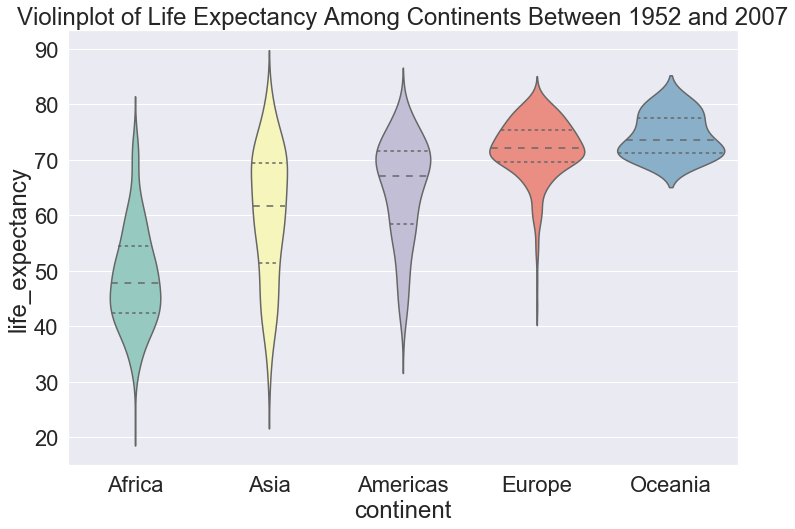

In [20]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set the plot
sns.violinplot(x="continent", y="life_expectancy", data=df,
               palette="Set3",
               order=["Africa", "Asia", "Americas", "Europe", "Oceania"],
               inner="quartile")

# save figure and set the title
plt.title("Violinplot of Life Expectancy Among Continents Between 1952 and 2007")
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/violinplot_cat2.png')

Text(0.5,1,'Violinplot of Life Expectancy Among Continents Between 1952 and 2007')

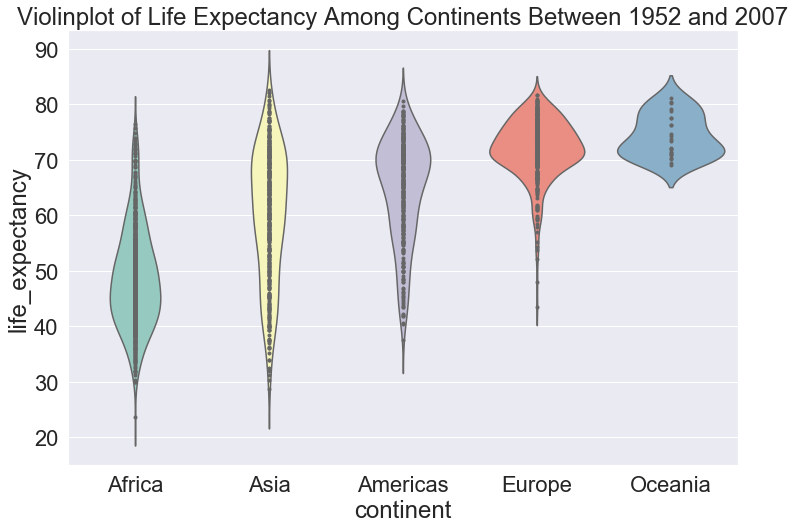

In [21]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set the plot
sns.violinplot(x="continent", y="life_expectancy", data=df,
               palette="Set3",
               order=["Africa", "Asia", "Americas", "Europe", "Oceania"],
               inner="point")

# set title and save figure
plt.title("Violinplot of Life Expectancy Among Continents Between 1952 and 2007")
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/violinplot_cat3.png')

Text(0.5,1,'Violinplot of Life Expectancy Among Continents Between 1952 and 2007')

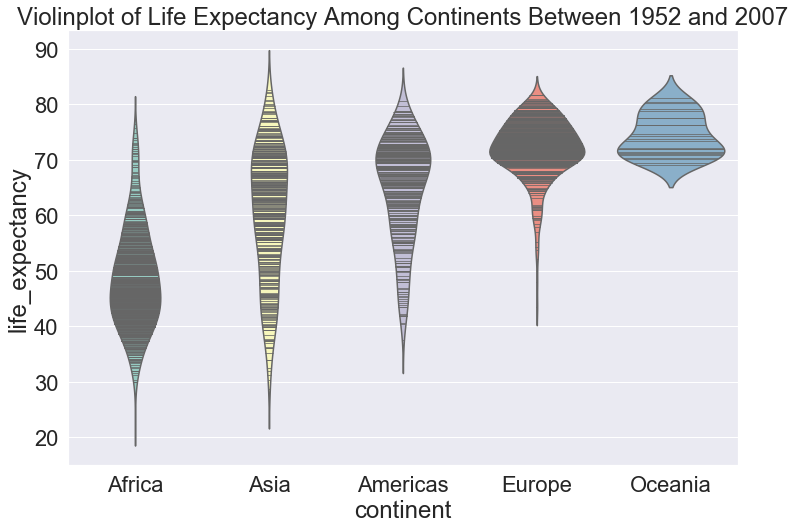

In [22]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set plot
sns.violinplot(x="continent", y="life_expectancy", data=df,
               palette="Set3",
               order=["Africa", "Asia", "Americas", "Europe", "Oceania"],
               inner="stick")

# set title and save figure
plt.title("Violinplot of Life Expectancy Among Continents Between 1952 and 2007")
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/violinplot_cat4.png')

### Violinplot with different `scale` Parameter

Text(0.5,1,'Violinplot of Life Expectancy Among Continents Between 1952 and 2007')

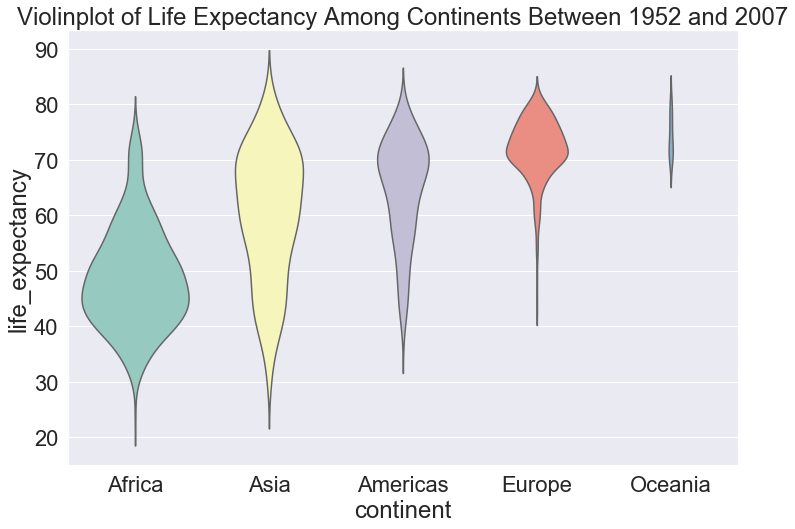

In [23]:
# prepare plot
f, ax = plt.subplots(figsize=(12, 8))

# set the plot
sns.violinplot(x="continent", y="life_expectancy", data=df,
               palette="Set3",
               order=["Africa", "Asia", "Americas", "Europe", "Oceania"],
               inner=None,
               scale="count")

# set title and save figure
plt.title("Violinplot of Life Expectancy Among Continents Between 1952 and 2007")
# plt.savefig('/home/cereyniyim/PythonProjects/CodeAcademyProjects/violinplot_cat5.png')

In [29]:
# create gif with different inner parameter violinplots
png_dir = '/home/cereyniyim/PythonProjects/CodeAcademyProjects/violinplots_inner'
images = []

for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

kargs = { 'duration': 1 }
imageio.mimsave('/home/cereyniyim/PythonProjects/CodeAcademyProjects/violinplots_inner/movie.gif', 
                images, 'GIF', **kargs)